# Mini Project - Regression

### Luggage Bags Cost Prediction

The dataset consists of 159 records of bags of different shapes and sizes with their carry capacity and finally price/cost.

In the data, I did notice that there is some garbage values and some values too high to be considered either noise or outlier. There are even Zero and NULL/NaN values to be addressed.

As the supplied master data is quite less, eliminating or deleting the records/rows is not ideal in the situation. As a result the records are modified for certain cells by different means.

## Exploratory Data Analysis (EDA) :

In [189]:
#We import all the necessary libraries as we find useful.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline


# Read the dataset and build pandas DataFrame to operate on in the code.


df = pd.read_csv('D:\PRIVATE\BITS Pilani\Google Drive\Assignments\AIML_C6_Nov_2021_Data_miniproject.csv')

# Visual check of the initial few records for valid data import.
df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [190]:
# Get the count of records (Rows & Columns)
df.shape

(159, 6)

In [191]:
# Find the statistics of the DataFrame to visually analyze and come up with necessary approach/es for further data processing.

df.describe()

,Cost,Weight1,Height
count,159.000000,159.000000,158.000000
mean,398.326415,28.415723,8.933124
std,357.978317,10.716328,4.273069
min,0.000000,8.400000,1.728400
25%,120.000000,21.000000,5.940600
50%,273.000000,27.300000,7.733000
75%,650.000000,35.500000,12.248700
max,1650.000000,63.400000,18.957000




Here we see that only 3 columns are presented properly and remaining 3 are not. It means, those columns are consisting of malformed/null/NaN/object values instead of numeric values.



In [192]:
# A quick NULL check for the columns for visual inspection.

df.isnull().sum() 

Cost       0
Weight     0
Weight1    0
Length     0
Height     1
Width      1
dtype: int64

During visual inspection in the earlier step, it was found that the column 'Cost' has a value 0.0 for remaining valid records. Assuming this is an error as there should not be any price as ZERO, we must fix this by eliminating this value and replacing with the average of the column.

In [193]:
df['Cost'] = df['Cost'].replace(0.0, np.nan)

In [194]:
df.isnull().sum() 

Cost       1
Weight     0
Weight1    0
Length     0
Height     1
Width      1
dtype: int64

Now we have one NaN in Cost column. This will replace with the average of the whole column.

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     158 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


A quick DataFrame.info() gives us the summary of the type of the columns. Here we can see that the columns "Weight", "Length", "Width" as object instead of float64. This indicates that the columns have either missing records resulting in NaN or have either characters or string (non-numeric data). We have to work on this now.

In [196]:
# A quick visual check.

df.isnull().head()

,Cost,Weight,Weight1,Length,Height,Width
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


We will now replace all the non-numeric values with NaN. This function will remove all non-numeric values which in turn will fill them with NULL values.

In [197]:
df['Weight'] = pd.to_numeric(df['Weight'], errors = 'coerce')
df['Length'] = pd.to_numeric(df['Length'], errors = 'coerce')
df['Width'] = pd.to_numeric(df['Width'], errors = 'coerce')

# We can see that all the columns are now of float64. This gives us easy handle to manipulate the numeric values with different mathematical operations.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     158 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [198]:
# A quick NULL check for the column data for visual interpretation.

df.isnull().sum() 

Cost       1
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64

We can see now (compared to earlier report) that we have more NULL values in the DataFrame as a result of elimination of garbage/string/character/0.0 values.


Now is the time to check the overall statistics of the DataFrame...

In [199]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,157.000000,159.000000,158.000000,158.000000,157.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,3826.050502
std,357.697796,10.052942,10.716328,11.646141,4.273069,47884.860134
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.000000,21.000000,23.125000,5.940600,3.395700
50%,281.500000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.589000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


Now we see the statistics in the above report. Let's go further to draw the BOXPLOTs to determine the outliers.

Index(['Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')


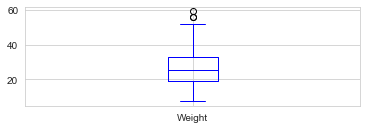

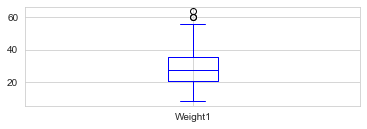

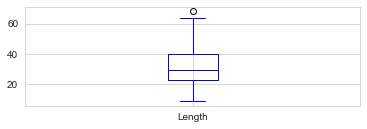

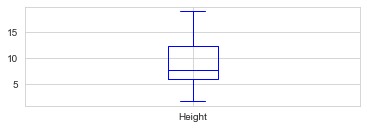

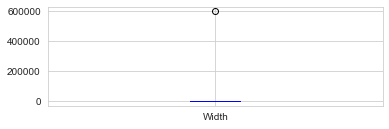

<AxesSubplot:xlabel='Width'>

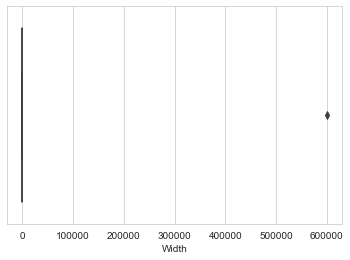

In [200]:
column = df.columns
features = column[1:]
print(features)

for i in features:
    plt.subplot(2,1,1)
    plt.x = df[i]
    df[i].plot(kind = 'box', color='blue')
    plt.show()
    
sns.boxplot(x = df['Width'])

We can see there are outliers in different columns: Weight, Weight1, Length. However they are not very far from the box hence we intend to keep them without change.

However, the outlier in Width is of real concern to us. In a few trials it is determined that except one value, which is 600000, rest all are below 10 (largest value is 8.142). It may mean that this value is wrongly entered by some means.

We have to work on this value.

The following approach gets us the values of the Cost column in descending order for visual inspection.

In [201]:
column_ = np.asarray(df['Width'])
count_altered_ = (column_ > 10).sum()
print('TOTAL Count of values "Width" above 10 (Outlier - extreme-far): ', count_altered_)
newlist = sorted(column_, reverse=True)
print(newlist)

TOTAL Count of values "Width" above 10 (Outlier - extreme-far):  1
[nan, 600000.0, 8.142, 7.7957, 7.5958, 7.4934, 7.48, 7.4624, 7.4165, 7.3514, 7.2772, 7.225, 7.1064, 6.9849, 6.8684, 6.864, 6.7497, 6.7473, 6.7408, 6.63, 6.603, 6.5736, 6.562, 6.525, 6.3875, 6.3705, 6.3666, 6.3063, 6.292, 6.2646, 6.1984, 6.1712, 6.144, 6.1306, 6.09, 6.0532, 6.018, 6.003, 5.8515, 5.7276, 5.589, 5.58, 5.5695, 5.376, 5.3704, 5.355, 5.2854, 5.2801, 5.2785, 5.1975, 5.1708, 5.1373, 5.134, 5.1338, 5.1296, 5.1042, 5.0728, 4.9594, 4.896, 4.87, 4.8438, 4.8146, 4.7736, 4.7716, 4.6961, 4.69, 4.6816, 4.6354, 4.5765, 4.5662, 4.4968, 4.459, 4.4555, 4.3844, 4.368, 4.335, 4.335, 4.3225, 4.3056, 4.2485, 4.2476, 4.239, 4.234, 4.2042, 4.1658, 4.158, 4.144, 4.144, 4.1272, 4.02, 4.0198, 3.995, 3.977, 3.906, 3.8352, 3.825, 3.8203, 3.8, 3.7544, 3.725, 3.723, 3.6835, 3.6675, 3.6636, 3.6312, 3.63, 3.626, 3.624, 3.624, 3.5742, 3.555, 3.5478, 3.534, 3.525, 3.525, 3.525, 3.4104, 3.4075, 3.3957, 3.3756, 3.3516, 3.325, 3.3216, 3.3075,

In [202]:
# We will now take the following actions:
#     - Remove the outlier value and fill the space with NAN
#     - Replace the NAN with the average of the column Cost.

# This exercise will get us achieve the replacement of the outlier with the average value

df1 = df

df1['Width'] = df1['Width'].replace(np.nan, 0.0)

column_ = df1['Width']
max_value = column_.max()
print('Max Value of COL-Width: ', max_value)

df['Width'] = df['Width'].replace(max_value, np.nan)
df['Width'] = df['Width'].replace(0.0, np.nan)


# A quick visual inspection of the statistics.
df.describe()

Max Value of COL-Width:  600000.0


,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,157.000000,159.000000,158.000000,158.000000,156.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,357.697796,10.052942,10.716328,11.646141,4.273069,1.678237
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.000000,21.000000,23.125000,5.940600,3.390675
50%,281.500000,25.200000,27.300000,29.700000,7.733000,4.248050
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.582250
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [203]:
# A quick NULL check.

df.isnull().sum() 

Cost       1
Weight     2
Weight1    0
Length     1
Height     1
Width      3
dtype: int64

In [204]:
column_ = np.asarray(df['Width'])
count_altered_ = (column_ > 10).sum()
print('TOTAL Count of values "Width" above 10: ', count_altered_)
#newlist = sorted(column_, reverse=True)
#newlist
column_

TOTAL Count of values "Width" above 10:  0


array([4.02  , 4.3056, 4.6961, 4.4555, 5.134 ,    nan, 5.2785, 4.69  ,
       4.8438, 4.9594, 5.1042, 4.8146, 4.368 , 5.0728, 5.1708, 5.58  ,
       5.2854, 5.1975, 5.1338, 5.7276, 5.5695, 5.3704, 5.2801, 6.1306,
       5.589 , 6.0532, 6.09  , 5.8515, 6.1984, 6.603 , 6.3063, 6.292 ,
       6.7497, 6.7473, 6.3705, 2.268 , 2.8217, 2.9044, 3.1746, 3.5742,
       3.3516, 3.3957, 3.2943, 3.7544, 3.5478, 3.8203, 3.325 , 3.8   ,
       3.8352, 3.6312, 4.1272, 3.906 , 4.4968, 4.7736, 5.355 , 4.2476,
       4.2485, 4.6816, 6.562 , 6.5736, 6.525 , 2.3265, 2.3142, 2.673 ,
       2.9181, 3.2928, 3.2944, 3.4104, 3.1571, 3.6636, 4.144 , 4.234 ,
       1.408 , 1.9992, 2.432 , 2.6316, 2.9415, 3.3216, 3.1234, 3.0502,
       3.0368, 2.772 , 3.555 , 3.3075, 3.6675, 3.534 , 3.4075, 3.525 ,
       3.525 , 3.525 , 3.995 , 3.624 , 3.624 , 3.63  , 3.626 , 3.725 ,
       3.723 , 3.825 , 4.1658, 3.6835, 4.239 , 4.144 , 5.1373, 4.335 ,
       4.335 , 4.5662, 4.2042, 4.6354, 4.7716, 6.018 , 6.3875, 7.7957,
      

In [205]:
column_ = np.asarray(df['Cost'])
count_altered_ = (column_ == 0.0).sum()
print('TOTAL Count of values "Cost" equal to 0.0: ', count_altered_)
count_altered_ = (column_ == np.nan).sum()
print('TOTAL Count of values "Cost" equal to NaN: ', count_altered_)
#newlist = sorted(column_, reverse=True)
#newlist
column_

TOTAL Count of values "Cost" equal to 0.0:  0
TOTAL Count of values "Cost" equal to NaN:  0


array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          nan,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [206]:
#df[df['Cost'] == 0.0] = np.nan

column_ = np.asarray(df['Cost'])
count_altered_ = (column_ == 0.0).sum()
print('TOTAL Count of values "Cost" equal to 0.0: ', count_altered_)
#newlist = sorted(column_, reverse=True)
#newlist
column_

TOTAL Count of values "Cost" equal to 0.0:  0


array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          nan,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [207]:
df.isnull().sum() 

Cost       1
Weight     2
Weight1    0
Length     1
Height     1
Width      3
dtype: int64

Let's fill the NaN values with the respective column average.

In [208]:
df['Width'].fillna(df['Width'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight1'].fillna(df['Weight1'].mean(), inplace=True)
df['Cost'].fillna(df['Cost'].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [209]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,356.564044,9.989113,10.716328,11.609227,4.259525,1.662228
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,290.000000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.574750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [210]:
column_ = np.asarray(df['Width'])
count_altered_ = (column_ > 10).sum()
newlist = sorted(column_)
newlist[0:5]

[1.0476, 1.1484, 1.1484, 1.16, 1.1659]

In [211]:
newlist = sorted(column_, reverse=True)
newlist[:5]

[8.142, 7.7957, 7.5958, 7.4934, 7.48]

Quick inspection of the Width column shows no ZERO value and the highest value is now replaced with average and the new largest value is the earlier second-largest.

In [212]:
# A final NULL check.

df.isnull().sum() 

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

In [213]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,356.564044,9.989113,10.716328,11.609227,4.259525,1.662228
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,290.000000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.574750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [214]:
df.value_counts()

Cost    Weight     Weight1  Length  Height   Width 
5.9     7.500000   8.4      8.8     2.1120   1.4080    1
540.0   28.500000  31.0     34.0    10.7440  6.5620    1
500.0   26.259873  30.7     36.2    14.2266  4.9594    1
        26.800000  29.7     34.5    14.1795  5.2785    1
        28.700000  31.0     36.2    14.3714  4.8146    1
                                                      ..
150.0   21.000000  23.0     24.5    5.2185   3.6260    1
160.0   20.500000  22.5     25.3    7.0334   3.8203    1
        21.100000  22.5     25.0    6.4000   3.8000    1
161.0   26.259873  23.4     26.7    6.9153   3.6312    1
1650.0  59.000000  63.4     68.0    10.8120  7.4800    1
Length: 159, dtype: int64

## Plotting Graphs & Correlations : 

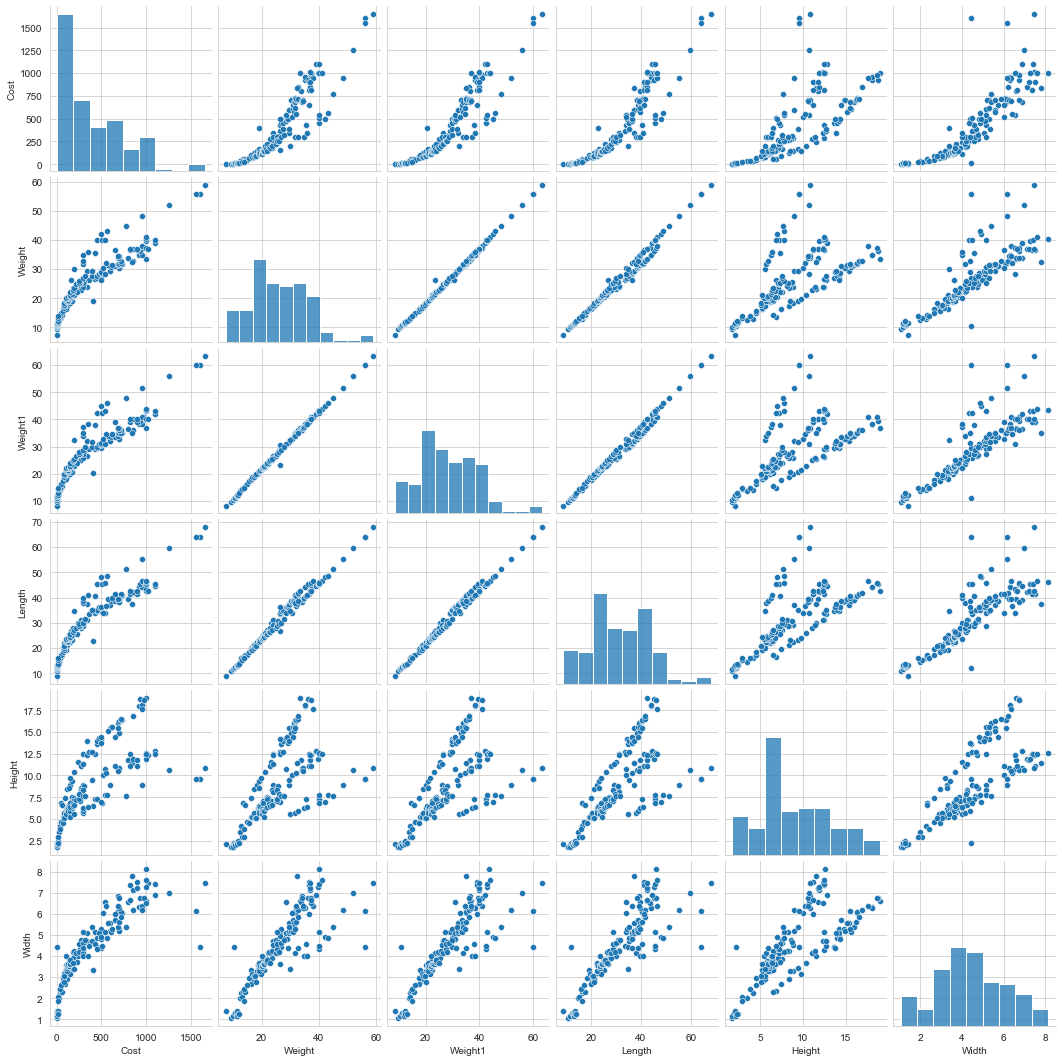

In [215]:
sns.pairplot(df)
plt.show()

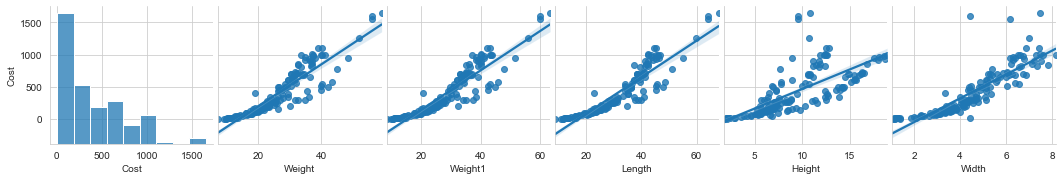

In [216]:
### Graphs
sns.pairplot(df, kind = 'reg', y_vars = 'Cost')
# hue = 'Cost'
# sns.pairplot(df, kind = 'reg', y_vars = 'Cost')

plt.show()

<AxesSubplot:xlabel='Weight'>

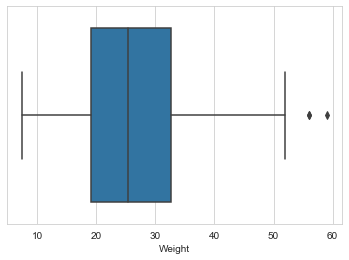

In [217]:
sns.boxplot(x = df['Weight'])

<AxesSubplot:xlabel='Weight1'>

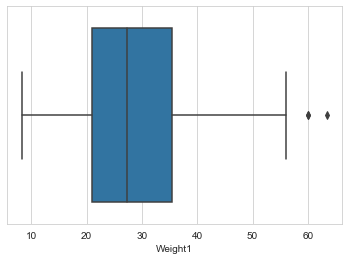

In [218]:
sns.boxplot(x = df['Weight1'])

<AxesSubplot:xlabel='Length'>

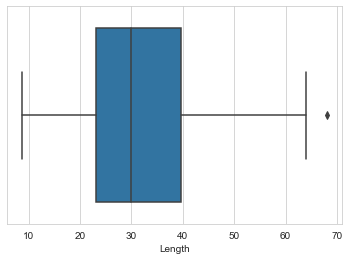

In [219]:
sns.boxplot(x = df['Length'])

<AxesSubplot:xlabel='Height'>

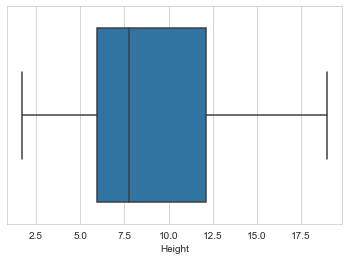

In [220]:
sns.boxplot(x = df['Height'])

<AxesSubplot:xlabel='Width'>

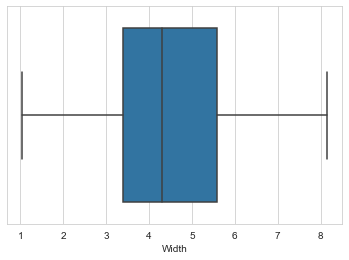

In [221]:
sns.boxplot(x = df['Width'])

<AxesSubplot:ylabel='Cost'>

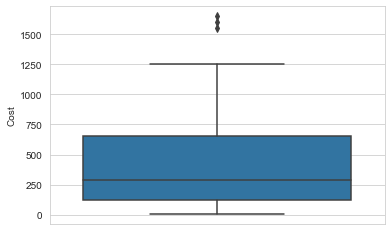

In [222]:
sns.boxplot(y = df['Cost'])

<AxesSubplot:>

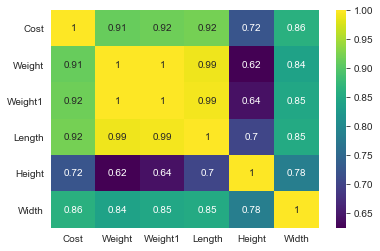

In [223]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap='viridis', annot=True)

# Model Building


## OLS Approach :

In [224]:
### model OLS
ols_model = LinearRegression()
x_data = df.drop(['Cost'], axis = 1)
y = df['Cost']
ols_model.fit(x_data, y)
print("Coefficent is {}".format(ols_model.coef_))
print('Intercept is {}'.format(ols_model.intercept_))

print('')
print('')
print('')
ols_stats = sm.ols('Cost ~ Weight + Weight1 + Length + Height + Width', df).fit()
print(ols_stats.params)

Coefficent is [ 11.63095391  36.60710039 -23.9166695   23.79502612  21.02459158]
Intercept is -503.2062535260667



Intercept   -503.206254
Weight        11.630954
Weight1       36.607100
Length       -23.916669
Height        23.795026
Width         21.024592
dtype: float64


In [225]:
ols_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.07e-68
Time:                        22:55:03   Log-Likelihood:                -991.63
No. Observations:                 159   AIC:                             1995.
Df Residuals:                     153   BIC:                             2014.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -503.2063     30.167    -16.681      0.000    -562.804    -443.608
Weight        11.6310     21.700      0.536      0.593     -31.239      54.501
Weight1       36.6071     25.315      1.446      0.150     -13.405      86.619
Length       -23.9167     15.308     -1.562      0.120     -54.160       6.326
Height        23.7950      7.487      3.178      0.002       9.005      38.585
Width         21.0246     17.056      1.233      0.220     -12.671      54.720
==============================================================================
Omnibus:                       18.848   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.651
Skew:                           0.773   Prob(JB):                     1.21e-05
Kurtosis:                       4.014   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
ols_stats.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.875    
Dependent Variable: Cost             AIC:                1995.2665
Date:               2021-12-01 22:55 BIC:                2013.6799
No. Observations:   159              Log-Likelihood:     -991.63  
Df Model:           5                F-statistic:        222.1    
Df Residuals:       153              Prob (F-statistic): 3.07e-68 
R-squared:          0.879            Scale:              15898.   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept   -503.2063  30.1673 -16.6805 0.0000 -562.8045 -443.6080
Weight        11.6310  21.6998   0.5360 0.5927  -31.2390   54.5009
Weight1       36.6071  25.3150   1.4461 0.1502  -13.4049   86.6191
Length       -23.9167  15.3083  -1.5623 0.1203  -54.1596    6.3262
Height        23.7950   7.4866   3.1784 0.0018    9.0046   38.5854
Width         21.0246  17.0559   1.2327 0.2196  -12.6709   54.7201
------------------------------------------------------------------
Omnibus:               18.848       Durbin-Watson:          0.527 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       22.651
Skew:                  0.773        Prob(JB):               0.000 
Kurtosis:              4.014        Condition No.:          178   
==================================================================

"""

Splitting the TRAINING data and TEST data at 90% and 10% respectively we can work out our MSE, RMSE, R^2 Errors.

In [227]:
X = df.drop(['Cost'], axis=1)
Y = df['Cost']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)

In [228]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [229]:
print('Coefficent : ', model.coef_)
print('Intercept  : ', model.intercept_)

Coefficent :  [ 10.86272908  47.72873384 -33.59405983  27.25583255  12.60801895]
Intercept  :  -491.128610711333


In [231]:
ols_stats
Y_predict = model.predict(X_test)

In [232]:
import sklearn.metrics as metrics  # To calculate the R Square, MSE & RMSE Errors

mse = metrics.mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error (MSE) : ', mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('Root Mean Squared Error (RMSE) : ', rmse)

r2 = metrics.r2_score(Y_test, Y_predict)
print('R Squared Error (Variance Score) : ', r2)

Mean Squared Error (MSE) :  6451.249355249119
Root Mean Squared Error (RMSE) :  80.31966979046365
R Squared Error (Variance Score) :  0.94108397635597


## Gradient Descent Approach :

In [233]:
x1 = df['Weight']
x2 = df['Weight1']
x3 = df['Length']
x4 = df['Height']
x5 = df['Width']

nos_data = float(len(x1)) # Total no of the data available for training
nos_data

159.0

In [234]:
coef_ = np.zeros(6)  # Coefficient for the linear model, initial values filled with 0
learn_rate = 0.001 # learning Rate

coef_

array([0., 0., 0., 0., 0., 0.])

In [76]:
'''def createInitialValues(X): # Function used to generate initial values for coefficients and intercept
    vect = np.array([0.0 for x in range(X.shape[1]+1)])
    return vect

def gradientDescent(X, Y, iv, learn_rate):
    N = len(X)
    y = np.dot(X, iv[1:]) + iv[0]
    dW0 = (-2 / N) * sum(Y - y)
    dW = (-2 / N) * (np.dot(np.transpose(X), (Y - y)))
    iv[0] -= learn_rate * dW0
    iv[1:] -= learn_rate * dW
    
    y = np.dot(X, iv[1:]) + iv[0]
    loss = (1 / N * sum(val ** 2 for val in (Y - y)))
    
    return loss
    '''

## Mini Batch Gradient Descent :

In [137]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01, iterations=10, batch_size =20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)),X_i]
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
    return theta, cost_history

In [168]:
lr = 0.05
n_iter = 50
theta = np.random.randn(2,5)
print(theta)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

[[ 0.76888685 -0.12950124  0.39928095  0.29593474 -0.81330181]
 [ 0.7547801   0.50318322 -0.40165595  0.55644821 -1.35125759]]


KeyError: "None of [Int64Index([133,  43,  11,  49,  41, 106,  36, 157,  90, 126,\n            ...\n             98,  35,  93,  53, 117,   7,   1,  78,  89,   0],\n           dtype='int64', length=159)] are in the [columns]"

NameError: name 'cost_history' is not defined

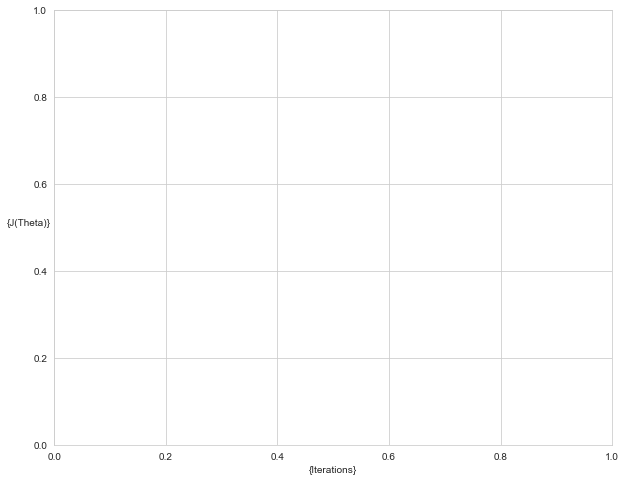

In [154]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel("{J(Theta)}", rotation=0)
ax.set_xlabel("{Iterations}")
theta = np.random.randn(2, 1)
_ = ax.plot(range(n_iter), cost_history, "b.")

NameError: name 'cost_history' is not defined

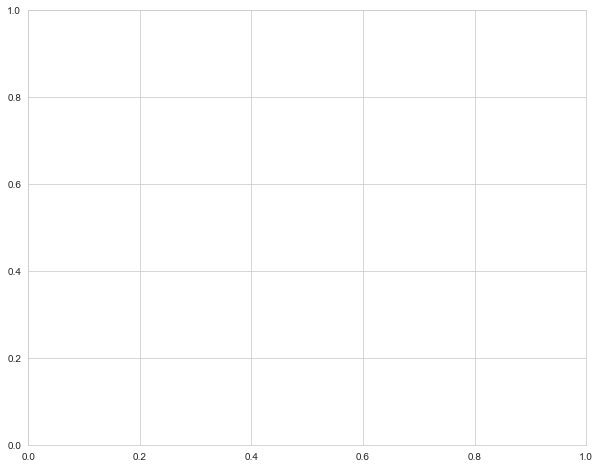

In [155]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(100),cost_history[:100],'b.')

## Stochastic Gradient Descent :

In [116]:
# Imported necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Data loaded 
dataset = df

In [117]:
# Data shape
dataset.shape


(159, 6)

In [118]:
# Feature name
dataset.columns


Index(['Cost', 'Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')

In [119]:
# This is y value i.e. target
dataset.shape


(159, 6)

In [120]:
# Convert it into pandas dataframe
data = pd.DataFrame(dataset, columns = dataset.columns)
data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [121]:
dataset.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,356.564044,9.989113,10.716328,11.609227,4.259525,1.662228
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,290.000000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.574750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [122]:
#standardize for fast convergence to minima
data = (data - data.mean())/data.std()
'''
data[1] = (data[1] - data[1].mean())/data[1].std()
data[2] = (data[2] - data[2].mean())/data[2].std()
data[3] = (data[3] - data[3].mean())/data[3].std()
data[4] = (data[4] - data[4].mean())/data[4].std()
data[5] = (data[5] - data[5].mean())/data[5].std()
'''
data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,-0.445495,-0.306321,-0.281414,-0.106746,0.607316,-0.242217
1,-0.310877,-0.226234,-0.197430,-0.003380,0.832693,-0.070400
2,-0.170649,-0.236244,-0.178767,-0.011994,0.808700,0.164526
3,-0.106145,0.004017,0.054522,0.194738,0.891385,0.019780
4,0.081760,0.024039,0.054522,0.237807,0.824241,0.427967


In [123]:
# MEDV(median value is usually target), change it to price
data["COST"] = dataset['Cost']
data.head()

,Cost,Weight,Weight1,Length,Height,Width,COST
0,-0.445495,-0.306321,-0.281414,-0.106746,0.607316,-0.242217,242.0
1,-0.310877,-0.226234,-0.197430,-0.003380,0.832693,-0.070400,290.0
2,-0.170649,-0.236244,-0.178767,-0.011994,0.808700,0.164526,340.0
3,-0.106145,0.004017,0.054522,0.194738,0.891385,0.019780,363.0
4,0.081760,0.024039,0.054522,0.237807,0.824241,0.427967,430.0


In [124]:
# Target and features
Y = data["COST"]
X = data.drop("COST", axis = 1)

In [125]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

Coefficients: 
 [81.29490224 82.00729228 73.14080011 47.88485245 70.62117228]
Y_intercept [407.61434424]


In [126]:
# Standardization

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 6) (16, 6) (143,) (16,)


In [128]:
x_train["COST"] = y_train
#x_test["PRICE"] = y_test

<ipython-input-128-3b1519c83846>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["COST"] = y_train


In [129]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

In [130]:
# The total sum of squares (proportional to the variance of the data)i.e. ss_tot 
# The sum of squares of residuals, also called the residual sum of squares i.e. ss_res 
# the coefficient of determination i.e. r^2(r squared)
def r_sq_score(b, m, features, target):
    for i in range(0, len(features)):
        x = features
        y = target
        mean_y = np.mean(y)
        ss_tot = sum((y[:,i] - mean_y) ** 2)
        ss_res = sum(((y[:,i]) - (np.dot(x[i], m) + b)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
    return r2

In [131]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate):
    n_iter = 500
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(55)
        y = np.asmatrix(train_sample["COST"])
        x = np.asmatrix(train_sample.drop("COST", axis = 1))
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[81.92692986]
 [69.83191027]
 [70.10381768]
 [70.59290469]
 [63.04222291]
 [68.09459951]] 
 y_intercept: [[150.44767273]]


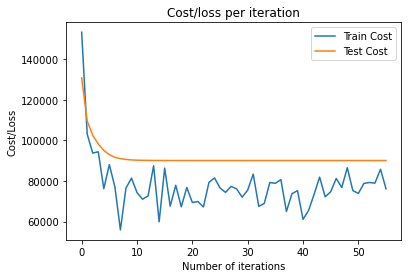

In [132]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(6)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

# Plot train and test error in each iteration
plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

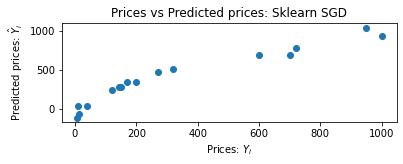

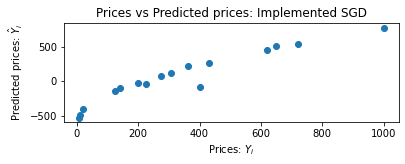

In [133]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

# Implemented SGD
plt.subplot(212)
plt.scatter([y_test], [(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

C:\Users\niranjans3ln\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\niranjans3ln\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


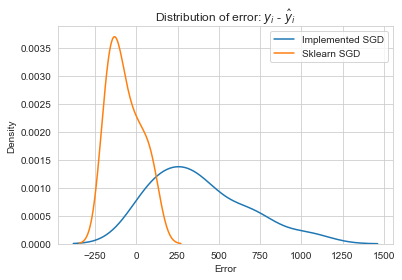

In [134]:
# Distribution of error
delta_y_im = np.asmatrix(y_test) - (np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)
delta_y_sk = Y_test - Y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.asarray(delta_y_im)[0], label = "Implemented SGD", bw = 0.5)
sns.kdeplot(np.array(delta_y_sk), label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

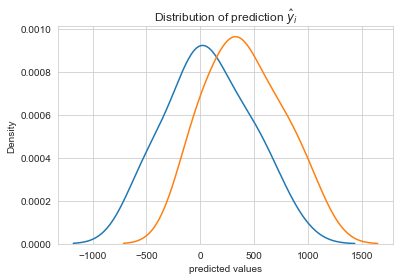

In [135]:
# Distribution of predicted value
sns.set_style('whitegrid')
sns.kdeplot(np.array(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b).T[0], label = "Implemented SGD")
sns.kdeplot(Y_pred, label = "Sklearn SGD")
plt.title("Distribution of prediction $\hat{y}_i$")
plt.xlabel("predicted values")
plt.ylabel("Density")
plt.show()

In [136]:
# Implemented SGD
# The mean squared error
mse = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean Squared Srror (MSE) : %.2f" % (mse))

rmse = np.sqrt(mse) # or mse**(0.5) 
print('Root Mean Squared Error (RMSE) : ', rmse)

# Explained variance score : 1 is perfect prediction
r_squared = r_sq_score(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("R Squared Error (Variance Score) : %.2f" % r_squared)


Mean Squared Srror (MSE) : 90068.41
Root Mean Squared Error (RMSE) :  [[300.11399146]]
R Squared Error (Variance Score) : -2.81


In [ ]:
### SPLITTING THE DATA

In [84]:
vals_X = df.values[:, 1:6]
vals_y = df.values[:, 0]

m = len(vals_y)

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(6):
    print('x =', vals_X[i, ], ', y =', vals_y[i])

Total no of training examples (m) = 159 

x = [23.2  25.4  30.   11.52  4.02] , y = 242.0
x = [24.     26.3    31.2    12.48    4.3056] , y = 290.0
x = [23.9    26.5    31.1    12.3778  4.6961] , y = 340.0
x = [26.3    29.     33.5    12.73    4.4555] , y = 363.0
x = [26.5   29.    34.    12.444  5.134] , y = 430.0
x = [26.8        29.7        34.7        13.6024      4.42262051] , y = 450.0


In [85]:
def feature_normalize(vals_X):
  """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(vals_X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(vals_X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
  X_norm = (vals_X - mu)/sigma
  return X_norm, mu, sigma

In [86]:
vals_X, mu, sigma = feature_normalize(vals_X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', vals_X[:5])

mu=  [26.25987261 28.41572327 31.23924051  8.93312405  4.42262051]
sigma=  [ 9.98911344 10.7163281  11.60922721  4.25952487  1.66222815]
X_norm=  [[-0.30632074 -0.28141386 -0.10674617  0.60731561 -0.24221736]
 [-0.22623355 -0.19742987 -0.00338011  0.83269286 -0.07039979]
 [-0.23624445 -0.17876676 -0.01199395  0.80869958  0.16452584]
 [ 0.00401711  0.0545221   0.19473816  0.89138485  0.01978037]
 [ 0.02403891  0.0545221   0.23780734  0.82424121  0.42796742]]


In [87]:
mu_testing = np.mean(vals_X, axis = 0) # mean
mu_testing

array([-2.17855084e-16, -1.45236723e-16,  2.79301390e-16,  1.34064667e-16,
       -3.35161668e-16])

In [89]:
sigma_testing = np.std(vals_X, axis = 0, ddof = 1) # mean
sigma_testing

array([1., 1., 1., 1., 1.])

In [95]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
vals_X = np.hstack((np.ones((m,1)), vals_X))
vals_X[:5]

array([[ 1.        ,  1.        , -0.30632074, -0.28141386, -0.10674617,
         0.60731561, -0.24221736],
       [ 1.        ,  1.        , -0.22623355, -0.19742987, -0.00338011,
         0.83269286, -0.07039979],
       [ 1.        ,  1.        , -0.23624445, -0.17876676, -0.01199395,
         0.80869958,  0.16452584],
       [ 1.        ,  1.        ,  0.00401711,  0.0545221 ,  0.19473816,
         0.89138485,  0.01978037],
       [ 1.        ,  1.        ,  0.02403891,  0.0545221 ,  0.23780734,
         0.82424121,  0.42796742]])

In [96]:
### COMPUTE THE COST

In [97]:
def compute_cost(vals_X, vals_y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = vals_X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, vals_y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  #J = 1 / (2 * m) * np.sum(sqrErrors)
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  # If your confuse about this try to do this with few values for better understanding  
  J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [98]:
### GRADIENT DESCENT

In [99]:
def gradient_descent(vals_X, vals_y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = vals_X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, vals_y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * vals_X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(vals_X, vals_y, theta)  

  return theta, cost_history

In [104]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(7)
iterations = 400;
alpha = 0.15;

In [105]:
theta, cost_history = gradient_descent(vals_X, vals_y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [200.42373418 200.42373418 100.37729435 100.48030767  36.58651542
  53.94459682  64.82696689]
First 5 values from cost_history = [54210.0857996  28060.59962559 17454.34165556 12531.9072718
 10152.3646622 ]
Last 5 values from cost_history = [7806.27262693 7806.17532943 7806.07809945 7805.98093696 7805.88384191]


In [ ]:
### VISUALIZATION

Text(0.5, 1.0, 'Convergence of gradient descent')

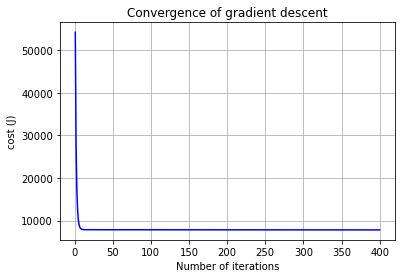

In [106]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

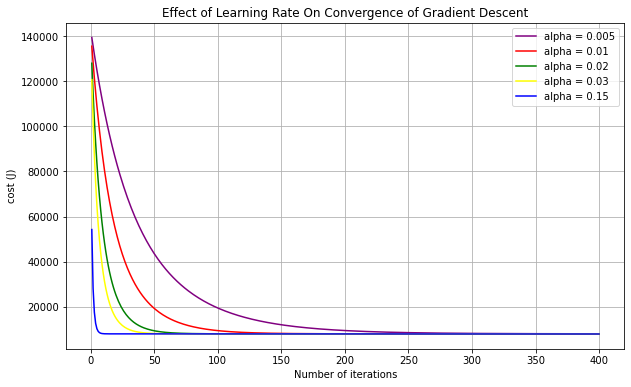

In [108]:
iterations = 400;
theta = np.zeros(7)

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.03;
theta_4, cost_history_4 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.15;
theta_5, cost_history_5 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

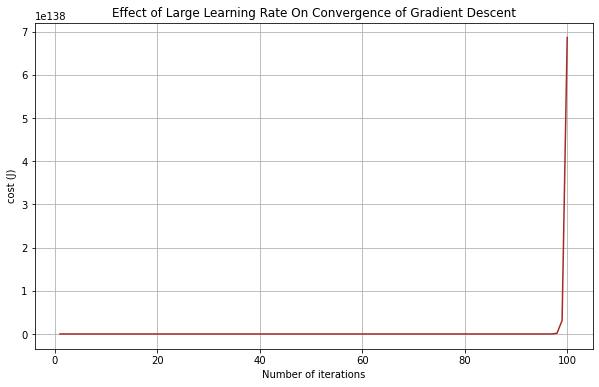

In [109]:
iterations = 100;
theta = np.zeros(7)

alpha = 1.32;
theta_6, cost_history_6 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [ ]:
### TESTING THE MODEL

In [115]:
normalize_test_data = ((np.array([28, 30, 36, 15, 6]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print('Predicted Cost of :', price)

ValueError: shapes (6,) and (7,) not aligned: 6 (dim 0) != 7 (dim 0)